# Proyek Analisis Data:  Bike Sharing Dataset
- **Nama:** Wafa Salma Sentanu
- **Email:** wafasalmasalma@gmail.com
- **ID Dicoding:** wafa_salma_sentanu

## Menentukan Pertanyaan Bisnis

#### 1. What are the peak rental periods during weekdays and weekends?
#### 2. Is there a difference in the total rental count between 2011 and 2012?
#### 3. How do weather conditions (temperature, humidity, and windspeed) correlate with the number of bike rentals?

## Import Semua Packages/Library yang Digunakan

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Data Wrangling

### Gathering Data

In [2]:
#import data day.csv
Bike_day = pd.read_csv('day.csv',index_col='dteday', parse_dates=['dteday'])
#import data hour.csv
Bike_hour = pd.read_csv('hour.csv',index_col='dteday', parse_dates=['dteday'])

In [3]:
data = {'Bike_day': Bike_day,
       'Bike_hour': Bike_hour}

In [4]:
data['Bike_day'].head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
data['Bike_hour'].head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Check Column using .info()

In [6]:
for names,df in data.items():
    print('\n', data[names].info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 91.4 KB

 None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 to 2012-12-31
Data columns (total 16 colu

#### Check Duplicate Data

In [7]:
check_duplicate = {}

for names,df in data.items():
    check_duplicate[names] = df.duplicated().sum()
    print(names, '\n', check_duplicate[names], '\n')

Bike_day 
 0 

Bike_hour 
 0 



#### Check Missing Value

In [8]:
check_null = {}

for names,df in data.items():
    check_null[names] = df.isna().sum()
    print(names, '\n', check_null[names], '\n')

Bike_day 
 instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 

Bike_hour 
 instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 



### Cleaning Data

### Bike_day Cleaning Data

Repairing Bike_day with Mapping

In [9]:
# Mapping
seasonMap = {1:'springer', 2:'summer', 
                  3:'fall', 4:'winter'}
Bike_day['season'] = Bike_day['season'].map(seasonMap)
#----------------------------------------------------------
yearsMap = {0: '2011', 1:'2012'}
Bike_day['yr'] = Bike_day['yr'].map(yearsMap)
#----------------------------------------------------------
monthsMap = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
                5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
                9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
Bike_day['mnth'] = Bike_day['mnth'].map(monthsMap)
#----------------------------------------------------------
weeksMap = {0:'Sun',1:'Mon',2:'Tue',
                3:'Wed',4:'Thu',5:'Fri',6:'Sat'}
Bike_day['weekday'] = Bike_day['weekday'].map(weeksMap)
#-----------------------------------------------------------
weatherMap = {1: 'Clear', 2: 'Mist + Cloudy',
                   3: 'Light Snow', 4: 'Heavy Rain'}
Bike_day['weathersit'] = Bike_day['weathersit'].map(weatherMap)
#-------------------------------------------------------------

data['Bike_day'].head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,springer,2011,Jan,0,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,springer,2011,Jan,0,Sun,0,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,springer,2011,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,springer,2011,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,springer,2011,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Repairing Data Type

In [10]:
data['Bike_day'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   season      731 non-null    object 
 2   yr          731 non-null    object 
 3   mnth        731 non-null    object 
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    object 
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    object 
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 91.4+ KB


In [11]:
Bike_day['season'] = Bike_day['season'].astype('category')
Bike_day['yr'] = Bike_day['yr'].astype('category')
Bike_day['mnth'] = Bike_day['mnth'].astype('category')
Bike_day['weekday'] = Bike_day['weekday'].astype('category')
Bike_day['weathersit'] = Bike_day['weathersit'].astype('category')

In [12]:
data['Bike_day'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     731 non-null    int64   
 1   season      731 non-null    category
 2   yr          731 non-null    category
 3   mnth        731 non-null    category
 4   holiday     731 non-null    int64   
 5   weekday     731 non-null    category
 6   workingday  731 non-null    int64   
 7   weathersit  731 non-null    category
 8   temp        731 non-null    float64 
 9   atemp       731 non-null    float64 
 10  hum         731 non-null    float64 
 11  windspeed   731 non-null    float64 
 12  casual      731 non-null    int64   
 13  registered  731 non-null    int64   
 14  cnt         731 non-null    int64   
dtypes: category(5), float64(4), int64(6)
memory usage: 67.6 KB


#### Rename column Bike_day

In [13]:
Bike_day.rename(columns={'yr':'years','mnth':'months','cnt':'count'}, inplace=True)
Bike_day.head()

,instant,season,years,months,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
dteday,,,,,,,,,,,,,,,
2011-01-01,1,springer,2011,Jan,0,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,springer,2011,Jan,0,Sun,0,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,springer,2011,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,springer,2011,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,springer,2011,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Bike_hour Cleaning Data

Drop data windspeed, because it doesn't need

In [14]:
Bike_hour['Bike_hour'] = data['Bike_hour'].drop(['windspeed'], axis=1, inplace=True)

Repairing Bike_hour using Mapping

In [15]:
seasonMap = {1:'springer', 2:'summer', 
                  3:'fall', 4:'winter'}
Bike_hour['season'] = Bike_hour['season'].map(seasonMap)
#----------------------------------------------------------
yearsMap = {0: '2011', 1:'2012'}
Bike_hour['yr'] = Bike_hour['yr'].map(yearsMap)
#----------------------------------------------------------
monthsMap = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
                5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
                9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
Bike_hour['mnth'] = Bike_hour['mnth'].map(monthsMap)
#----------------------------------------------------------
weeksMap = {0:'Sun',1:'Mon',2:'Tue',
                3:'Wed',4:'Thu',5:'Fri',6:'Sat'}
Bike_hour['weekday'] = Bike_hour['weekday'].map(weeksMap)
#-----------------------------------------------------------
weatherMap = {1: 'Clear', 2: 'Mist + Cloudy',
                   3: 'Light Snow', 4: 'Heavy Rain'}
Bike_hour['weathersit'] = Bike_hour['weathersit'].map(weatherMap)
#-------------------------------------------------------------

data['Bike_hour'].head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt,Bike_hour
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,springer,2011,Jan,0,0,Sat,0,Clear,0.24,0.2879,0.81,3,13,16,None
2011-01-01,2,springer,2011,Jan,1,0,Sat,0,Clear,0.22,0.2727,0.80,8,32,40,None
2011-01-01,3,springer,2011,Jan,2,0,Sat,0,Clear,0.22,0.2727,0.80,5,27,32,None
2011-01-01,4,springer,2011,Jan,3,0,Sat,0,Clear,0.24,0.2879,0.75,3,10,13,None
2011-01-01,5,springer,2011,Jan,4,0,Sat,0,Clear,0.24,0.2879,0.75,0,1,1,None


#### Repairing Data Type

In [16]:
data['Bike_hour'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 to 2012-12-31
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   season      17379 non-null  object 
 2   yr          17379 non-null  object 
 3   mnth        17379 non-null  object 
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  object 
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  object 
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
 15  Bike_hour   0 non-null      object 
dtypes: float64(3), int64(7), object(6)
memory usage: 2.3+ MB


In [17]:
Bike_hour['season'] = Bike_hour['season'].astype('category')
Bike_hour['yr'] = Bike_hour['yr'].astype('category')
Bike_hour['mnth'] = Bike_hour['mnth'].astype('category')
Bike_hour['weekday'] = Bike_hour['weekday'].astype('category')
Bike_hour['weathersit'] = Bike_hour['weathersit'].astype('category')

In [18]:
data['Bike_hour'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 to 2012-12-31
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   season      17379 non-null  category
 2   yr          17379 non-null  category
 3   mnth        17379 non-null  category
 4   hr          17379 non-null  int64   
 5   holiday     17379 non-null  int64   
 6   weekday     17379 non-null  category
 7   workingday  17379 non-null  int64   
 8   weathersit  17379 non-null  category
 9   temp        17379 non-null  float64 
 10  atemp       17379 non-null  float64 
 11  hum         17379 non-null  float64 
 12  casual      17379 non-null  int64   
 13  registered  17379 non-null  int64   
 14  cnt         17379 non-null  int64   
 15  Bike_hour   0 non-null      object  
dtypes: category(5), float64(3), int64(7), object(1)
memory usage: 1.7+ MB


#### Bins Hour

In [19]:
def period(hr):
    if (hr >= 5) and (hr <= 12):
        return 'Morning'
    elif (hr >= 13) and (hr <= 17):
        return 'Afternoon'
    elif (hr >= 18) and (hr <= 21):
        return 'Evening'
    else:
        return 'Night'

# Add new column 'period' based on 'hr' column
Bike_hour['period'] = Bike_hour['hr'].apply(period)

# Drop 'hr' and 'bikeHour' columns
Bike_hour.drop(['hr', 'Bike_hour'], axis=1, inplace=True)

In [20]:
Bike_hour

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt,period
dteday,,,,,,,,,,,,,,,
2011-01-01,1,springer,2011,Jan,0,Sat,0,Clear,0.24,0.2879,0.81,3,13,16,Night
2011-01-01,2,springer,2011,Jan,0,Sat,0,Clear,0.22,0.2727,0.80,8,32,40,Night
2011-01-01,3,springer,2011,Jan,0,Sat,0,Clear,0.22,0.2727,0.80,5,27,32,Night
2011-01-01,4,springer,2011,Jan,0,Sat,0,Clear,0.24,0.2879,0.75,3,10,13,Night
2011-01-01,5,springer,2011,Jan,0,Sat,0,Clear,0.24,0.2879,0.75,0,1,1,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,17375,springer,2012,Dec,0,Mon,1,Mist + Cloudy,0.26,0.2576,0.60,11,108,119,Evening
2012-12-31,17376,springer,2012,Dec,0,Mon,1,Mist + Cloudy,0.26,0.2576,0.60,8,81,89,Evening
2012-12-31,17377,springer,2012,Dec,0,Mon,1,Clear,0.26,0.2576,0.60,7,83,90,Evening


#### Rename column Bike_hour

In [21]:
Bike_hour.rename(columns={'yr':'years','mnth':'months','cnt':'count'}, inplace=True)
Bike_hour.head()

,instant,season,years,months,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,count,period
dteday,,,,,,,,,,,,,,,
2011-01-01,1,springer,2011,Jan,0,Sat,0,Clear,0.24,0.2879,0.81,3,13,16,Night
2011-01-01,2,springer,2011,Jan,0,Sat,0,Clear,0.22,0.2727,0.80,8,32,40,Night
2011-01-01,3,springer,2011,Jan,0,Sat,0,Clear,0.22,0.2727,0.80,5,27,32,Night
2011-01-01,4,springer,2011,Jan,0,Sat,0,Clear,0.24,0.2879,0.75,3,10,13,Night
2011-01-01,5,springer,2011,Jan,0,Sat,0,Clear,0.24,0.2879,0.75,0,1,1,Night


In [43]:
with pd.ExcelWriter('Bike_rental.xlsx') as writer:
    Bike_day.to_excel(writer, sheet_name='day', index=True)  # Write bikeDay to Sheet1 (day)
    Bike_hour.to_excel(writer, sheet_name='period', index=True) #Write bikeHour to Sheet2 (period)

In [22]:
file_path = r'C:\Users\User\FIX_ProyekDatnal\dashboard\Bike_day.csv'
Bike_day.to_csv(file_path, index=False)

In [23]:
file_path = r'C:\Users\User\FIX_ProyekDatnal\dashboard\Bike_hour.csv'
Bike_hour.to_csv(file_path, index=False)

## Exploratory Data Analysis (EDA)

### Explore Rent Total each Month

In [24]:
totalRent_Month = data['Bike_day'].groupby(['years','months']).agg({
    'count':'sum'
})
totalRent_Month

count
years months        
2011  Apr      94870
      Aug     136691
      Dec      87323
      Feb      48215
      Jan      38189
      Jul     141341
      Jun     143512
      Mar      64045
      May     135821
      Nov     102167
      Oct     123511
      Sep     127418
2012  Apr     174224
      Aug     214503
      Dec     123713
      Feb     103137
      Jan      96744
      Jul     203607
      Jun     202830
      Mar     164875
      May     195865
      Nov     152664
      Oct     198841
      Sep     218573

In [25]:
# maximum and minimum rental months for 2011
maxRent_2011 = totalRent_Month.loc['2011', ('count')].idxmax()
minRent_2011 = totalRent_Month.loc['2011', ('count')].idxmin()

# maximum and minimum rental months for 2012
maxRent_2012 = totalRent_Month.loc['2012', ('count')].idxmax()
minRent_2012 = totalRent_Month.loc['2012', ('count')].idxmin()

print('2011:')
print('Maximum rental month:', maxRent_2011)
print('Minimum rental month:', minRent_2011)

print('\n2012:')
print('Maximum rental month:', maxRent_2012)
print('Minimum rental month:', minRent_2012)

2011:
Maximum rental month: Jun
Minimum rental month: Jan

2012:
Maximum rental month: Sep
Minimum rental month: Jan


#### In 2011, June experienced the highest number of bicycle rentals, while January had the lowest. Similarly, in 2012, September recorded the peak in bicycle rentals, with January again showing the lowest count. This analysis indicates a possible seasonal trend in bicycle rentals, where warmer months generally exhibit higher demand compared to colder months.

### Explore Rent Total each Season

In [26]:
countRent_Season = data['Bike_day'].groupby(['season']).agg({
    'count':['sum','mean','max','min']
})
countRent_Season

count                         
              sum         mean   max   min
season                                    
fall      1061129  5644.303191  8714  1115
springer   471348  2604.132597  7836   431
summer     918589  4992.331522  8362   795
winter     841613  4728.162921  8555    22

In [27]:
maxRent_Season = countRent_Season['count']['sum'].idxmax()
minRent_Season = countRent_Season['count']['sum'].idxmin()
print('High bicycle rent is in:', maxRent_Season, '\n' "Low bicycle rent is in:", minRent_Season)

High bicycle rent is in: fall 
Low bicycle rent is in: springer


#### Based on the results above, the peak bicycle rentals were recorded during the fall season, whereas the lowest rentals were noted in the spring season.

### Explore Rent Total each Day

In [28]:
countRent_Day = data['Bike_day'].groupby(['weekday']).agg({
    'count':['sum','mean','max','min']
})
countRent_Day

count                         
            sum         mean   max   min
weekday                                 
Fri      487790  4690.288462  8362  1167
Mon      455503  4338.123810  7525    22
Sat      477807  4550.542857  8714   627
Sun      444027  4228.828571  8227   605
Thu      485395  4667.259615  7804   431
Tue      469109  4510.663462  7767   683
Wed      473048  4548.538462  8173   441

In [29]:
maxRent_Day = countRent_Day['count']['sum'].idxmax()
minRent_Day = countRent_Day['count']['sum'].idxmin()
print('High bicycle rent is in:', maxRent_Day, '\n' "Low bicycle rent is in:", minRent_Day)

High bicycle rent is in: Fri 
Low bicycle rent is in: Sun


#### According to the results above, the highest number of bicycle rentals took place on Thursday, while the lowest occurred on Sunday.

### Explore Rent Total each Weather

In [30]:
countRent_Weather = data['Bike_day'].groupby(['weathersit']).agg({
    'count':['sum','mean','max','min']
})
countRent_Weather

count                        
                   sum         mean   max  min
weathersit                                    
Clear          2257952  4876.786177  8714  431
Light Snow       37869  1803.285714  4639   22
Mist + Cloudy   996858  4035.862348  8362  605

In [31]:
maxRent_Weather = countRent_Weather['count']['sum'].idxmax()
minRent_Weather = countRent_Weather['count']['sum'].idxmin()
print('High bicycle rent is in:', maxRent_Weather, '\n' "Low bicycle rent is in:", minRent_Weather)

High bicycle rent is in: Clear 
Low bicycle rent is in: Light Snow


#### Based on the results above, it is observed that the highest number of bicycle rentals happened during clear weather, while the lowest occurred during light snow conditions.

### Explore Rent Total each Period

#### in Weekday

In [32]:
print(Bike_hour.columns)

Index(['instant', 'season', 'years', 'months', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'casual',
       'registered', 'count', 'period'],
      dtype='object')


In [33]:
weekday_Filter = Bike_hour[Bike_hour['weekday'].isin(["Mon", "Tue", "Wed", "Thu", "Fri"])]
countRent_Weekday = weekday_Filter.groupby(['period']).agg({
    'count':['sum','mean','max','min'],
})
countRent_Weekday.sort_values(('count','sum'),ascending=False)

count                     
              sum        mean  max min
period                                
Morning    834376  201.735010  839   1
Afternoon  728611  280.558722  976  11
Evening    652849  314.474470  977   6
Night      155009   43.590832  502   1

In [34]:
maxRent_PeriodWeekday = countRent_Weekday['count']['sum'].idxmax()
minRent_PeriodWeekday = countRent_Weekday['count']['sum'].idxmin()
print('High bicycle rent is in:', maxRent_PeriodWeekday, '\n' "Low bicycle rent is in:", minRent_PeriodWeekday)

High bicycle rent is in: Morning 
Low bicycle rent is in: Night


#### According to the results above, the highest number of bicycle rentals during the weekday occurs in the morning (5 AM - 12 PM), while the lowest takes place at night (10 PM - 4 AM).

#### in Weekend

In [35]:
weekend_Filter = Bike_hour[Bike_hour['weekday'].isin(["Sun","Sat"])]
countRent_Weekend = weekend_Filter.groupby(['period']).agg({
    'count':['sum','mean','max','min'],
})
countRent_Weekend.sort_values(('count','sum'),ascending=False)

count                     
              sum        mean  max min
period                                
Afternoon  379717  361.635238  783   7
Morning    271618  162.742960  776   1
Evening    173707  207.783493  645   7
Night       96792   66.341330  338   1

In [36]:
maxRent_PeriodWeekend = countRent_Weekend['count']['sum'].idxmax()
minRent_PeriodWeekend = countRent_Weekend['count']['sum'].idxmin()
print('High bicycle rent is in:', maxRent_PeriodWeekend, '\n' "Low bicycle rent is in:", minRent_PeriodWeekend)

High bicycle rent is in: Afternoon 
Low bicycle rent is in: Night


#### Based on the results above, it is evident that the highest number of bicycle rentals during the weekend takes place in the afternoon (1 PM - 5 PM), while the lowest occurs at night (10 PM - 4 AM).

## Visualization & Explanatory Analysis

### Question 1: What are the peak rental periods during weekdays and weekends?

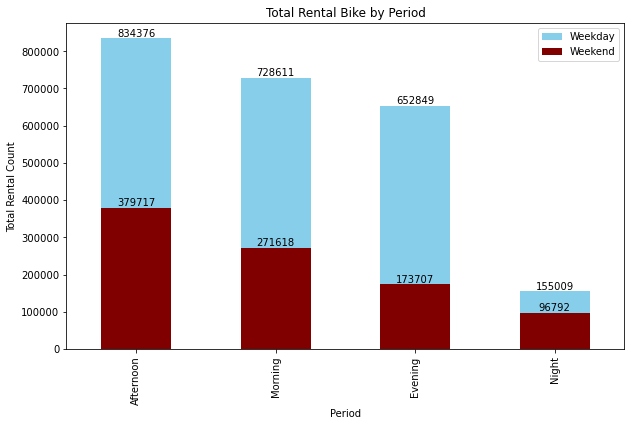

In [37]:
# Plotting total rental bike for weekday by period
countRent_PeriodWeekday_sum = countRent_Weekday[('count', 'sum')].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
countRent_PeriodWeekday_sum.plot(kind='bar',color='skyblue', label='Weekday')
plt.title('Total Rental Bike by Period')
plt.xlabel('Period')
plt.ylabel('Total Rental Count')
for i, value in enumerate(countRent_PeriodWeekday_sum):
    plt.text(i, value, str(int(value)), ha='center', va='bottom')

# Plotting total rental bike for weekend by period on the same plot
countRent_PeriodWeekend_sum = countRent_Weekend[('count', 'sum')].sort_values(ascending=False)
countRent_PeriodWeekend_sum.plot(kind='bar', color='maroon', alpha=1, label='Weekend')
for i, value in enumerate(countRent_PeriodWeekend_sum):
    plt.text(i, value, str(int(value)), ha='center', va='bottom')

# Adding labels, legend, and displaying the plot
plt.title('Total Rental Bike by Period')
plt.xlabel('Period')
plt.ylabel('Total Rental Count')
plt.legend()
plt.show()

According to the figure "Total Rental Bike for Weekdays by Period," the highest number of bike rentals takes place during the "Morning" period (5 AM - 12 PM), with a total of 834,376 rentals. The figure also indicates that the "Night" period (10 PM - 4 AM) has the fewest rentals, with only 155,009.

On the other hand, the figure "Total Rental Bike for Weekends by Period" shows that the most bike rentals occur during the "Afternoon" period (1 PM - 5 PM), with 379,717 rentals. Similar to the weekday figure, the "Night" period (10 PM - 4 AM) has the lowest number of rentals, totaling 96,792.

**Question 1:** What are the peak rental times during weekdays and weekends? 

**Answer:** The peak rental period during weekdays is in the Morning (5 AM - 12 PM), while for weekends, it's in the Afternoon (1 PM - 5 PM).

### **Question 2:** Is there a difference in the total rental count between 2011 and 2012?

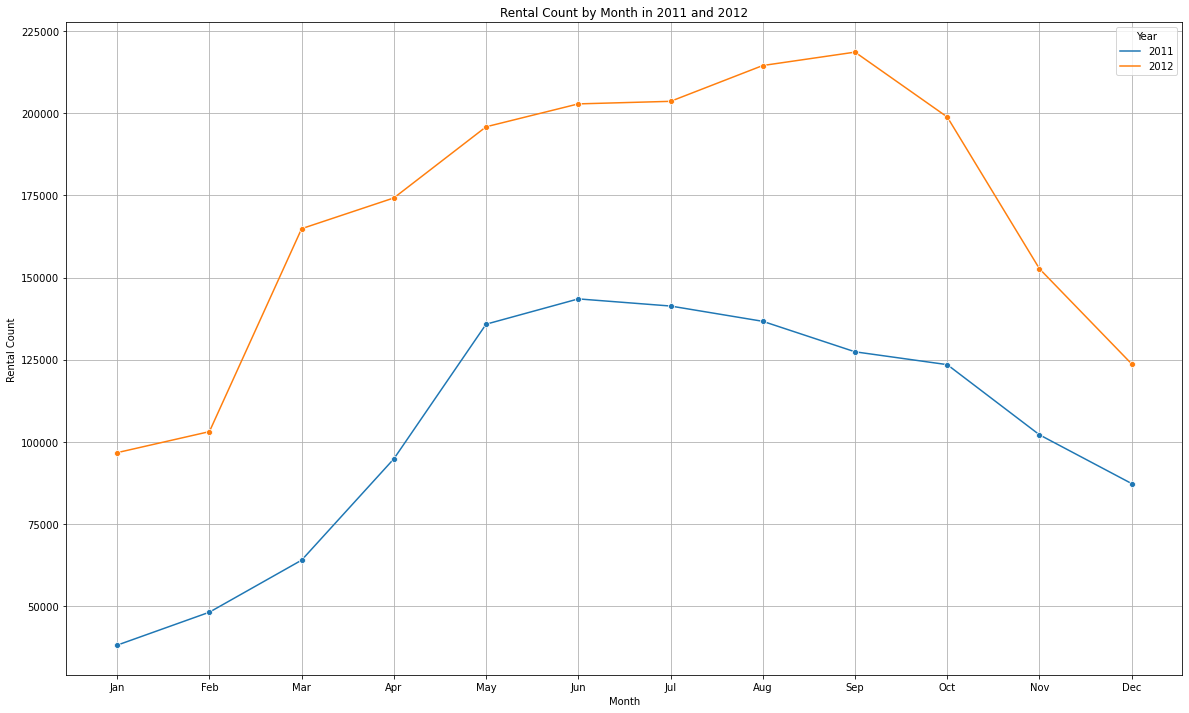

In [38]:
countRent_Month = data['Bike_day'].groupby(['years','months']).agg({
    'count':'sum'
}).reset_index()

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
countRent_Month["months"] = pd.Categorical(countRent_Month["months"], categories=month_order, ordered=True)

# Plotting
plt.figure(figsize=(20, 12))
sns.lineplot(data=countRent_Month, x="months", y="count", hue="years", marker="o")
plt.title('Rental Count by Month in 2011 and 2012')
plt.xlabel('Month')
plt.ylabel('Rental Count')
plt.legend(title='Year')
plt.grid(True)
plt.show()

**Question 2:** Is there a difference in the total rental count between 2011 and 2012?

**Answer:** The graph shows the total rental count per month in 2011 and 2012. It is evident that there is a seasonal pattern in rental counts for both years. Both years exhibit a similar pattern, with rental counts peaking around July to September and reaching their lowest points in January and February. This seasonal trend suggests that there might be external factors, such as weather or holiday seasons, influencing rental demand.

### Question 3: How do weather conditions (temperature, humidity, and windspeed) correlate with the number of bike rentals?

               temp       hum  windspeed     count
temp       1.000000  0.126963  -0.157944  0.627494
hum        0.126963  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.248489   1.000000 -0.234545
count      0.627494 -0.100659  -0.234545  1.000000


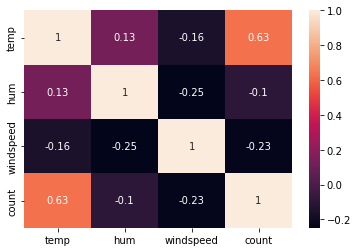

In [39]:
correlation = Bike_day[['temp','hum','windspeed','count']]
correlation = correlation.corr()
sns.heatmap(correlation, annot=True)
print(correlation)
plt.show()

The correlation coefficients between weather conditions (temperature, humidity, and windspeed) and the bike rental count are as follows:

- Temperature (temp) and bike rental count (total): 0.627494 (positive correlation)
- Humidity (hum) and bike rental count (total): -0.100659 (negative correlation)
- Windspeed (windspeed) and bike rental count (total): -0.234545 (negative correlation)

**Question 3:** What is the correlation between weather conditions (temperature, humidity, and windspeed) and the bike rental count?

**Answer:**

- Temperature has a moderate positive correlation with bike rental counts, meaning that higher temperatures tend to result in more bike rentals.
- Humidity has a weak negative correlation with bike rental counts, suggesting that higher humidity slightly reduces the number of bike rentals.
- Windspeed has a weak negative correlation with bike rental counts, indicating that stronger winds are associated with a slight decrease in bike rentals.

## Conclusion

1. **Peak Rental Times:** The highest bike rentals occur in the morning on weekdays (5 AM - 12 PM) and in the afternoon on weekends (1 PM - 5 PM).

2. **Seasonal Trends:** Both 2011 and 2012 show a seasonal pattern in bike rentals, peaking from July to September and dropping in January and February.

3. **Weather Correlation:** Temperature has a moderate positive correlation with bike rentals, while humidity and windspeed have weak negative correlations, indicating that higher temperatures encourage more rentals.